Data set is supposed to be
* some time  still
* shake hard in z
* pause
* shake hard in x (really xy)
* pause
* (fiddling with it)

Board +x is "down-ish", +y is to the right, +z is out her back (right handed coordinate systyem, whem)

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

import pandas as pd

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
ACCEL_SCALING = 2 * 2**-15 # +/-2 G in an i16

In [4]:
data = pd.read_csv('dump_other_accelerometer_shake.csv')
data

,TIME,qw,qx,qy,qz,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,REMINFIFO
0,1.059174,16231,1713,-1428,-63,7010,9794,9400,-66,-26,12,0
1,1.059174,16227,1736,-1450,-59,7254,9630,9316,-45,-22,75,0
2,1.059174,16222,1760,-1472,-54,7388,9488,9434,-32,-21,41,0
3,1.059174,16217,1784,-1494,-56,7208,9560,9296,-33,-24,-17,0
4,1.059174,16213,1808,-1516,-58,7236,9566,9368,-40,-25,-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,40.589813,3304,-6173,-7395,-12836,11200,9758,3990,-870,336,-567,0
3968,40.589813,3252,-6194,-7392,-12840,12756,8044,2082,-656,-401,-308,0
3969,40.589813,3173,-6250,-7349,-12858,13992,8350,1238,-823,-860,-477,0
3970,40.589813,3101,-6286,-7347,-12859,12064,7256,3322,-319,-428,-520,0


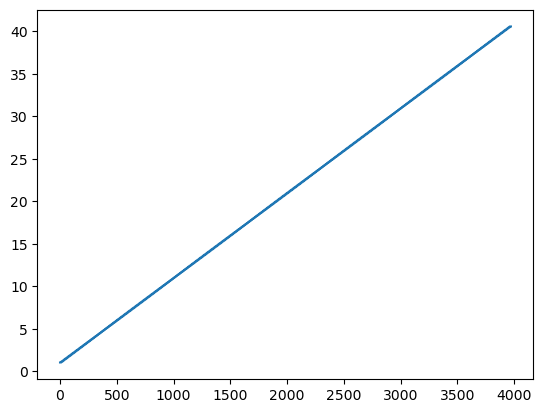

In [5]:
t = np.array(data['TIME'])
plt.plot(t)

Try evenly interpolating the time...

(39.63131713867188, 40.58981323242188)

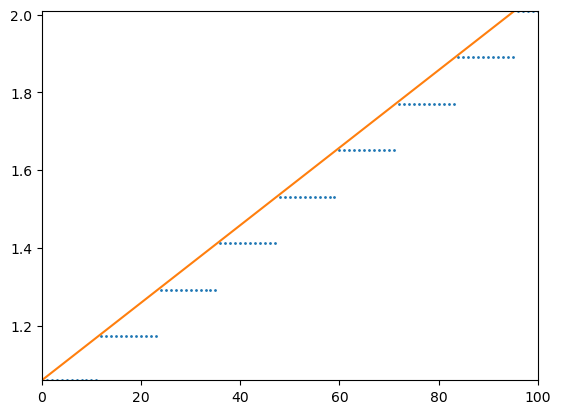

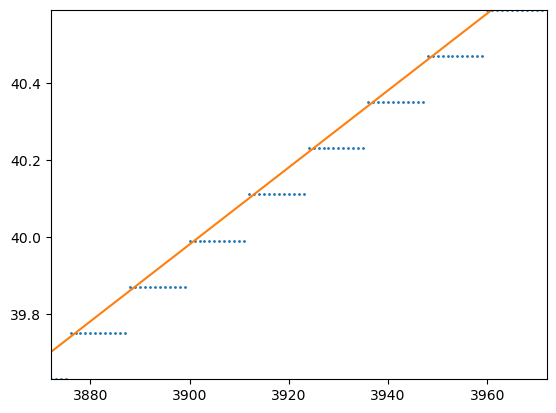

In [6]:
test = np.linspace(t[0], t[-1]+.1, len(t))

plt.figure()
plt.scatter(np.arange(len(t)), t, s=1, c='C0')
plt.plot(np.arange(len(test)), test, c='C1')
plt.xlim(0, 100)
plt.ylim(t[0], t[100])


plt.figure()
plt.scatter(np.arange(len(t)), t, s=1, c='C0')
plt.plot(np.arange(len(test)), test, c='C1')
plt.xlim(len(t)-100, len(t))
plt.ylim(t[-100], t[-1])

In [7]:
ax = ACCEL_SCALING*np.array(data['accel_x'])
ay = ACCEL_SCALING*np.array(data['accel_y'])
az = ACCEL_SCALING*np.array(data['accel_z'])
atot = (ax*ax + ay*ay + az*az)**0.5
atot

array([0.00439114, 0.00550468, 0.00342341, ..., 0.0782693 , 0.0454843 ,
       0.04519265])

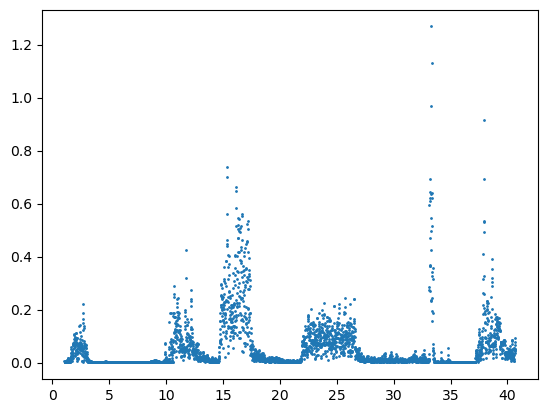

In [8]:
plt.scatter(test, atot, s=1)

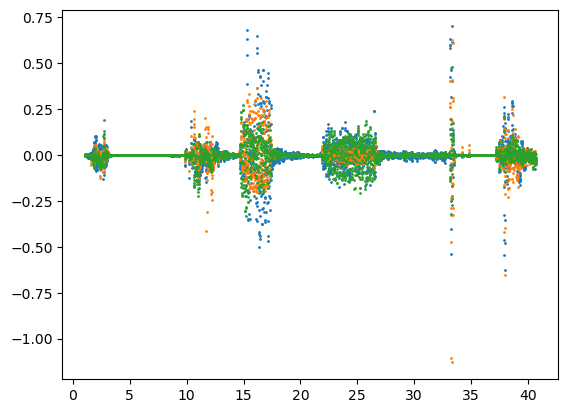

In [9]:
plt.scatter(test, ax, s=1)
plt.scatter(test, ay, s=1)
plt.scatter(test, az, s=1);

(15.0, 22.0)

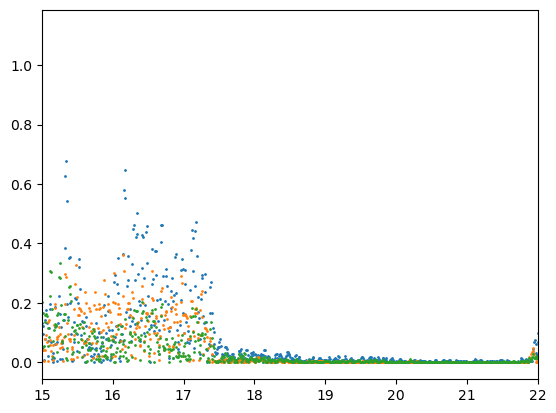

In [10]:
plt.scatter(test, np.abs(ax), s=1)
plt.scatter(test, np.abs(ay), s=1)
plt.scatter(test, np.abs(az), s=1)

plt.xlim(15, 22)

Gyro, just out of curiosity

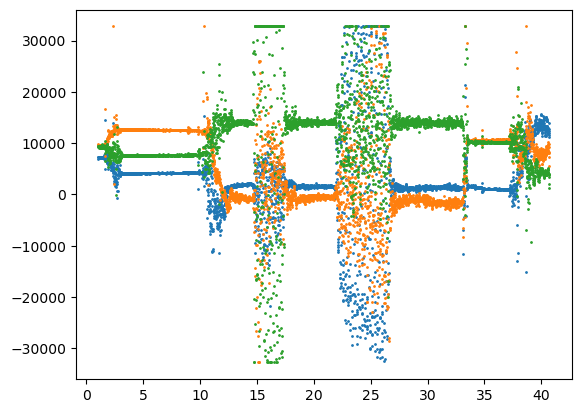

In [11]:
plt.scatter(test, data['gyro_x'], s=1)
plt.scatter(test, data['gyro_y'], s=1)
plt.scatter(test, data['gyro_z'], s=1)

In [12]:
1/np.diff(test)

array([100.20024999, 100.20024999, 100.20024999, ..., 100.20024999,
       100.20024999, 100.20024999])

It's supposed to be 100 Hz so that adds up

In [13]:
q = np.array([data['qw'], data['qx'], data['qy'], data['qz']])*2**-14
np.sum(q*q.astype(float),axis=0)**0.5

array([0.99997658, 0.99999953, 0.9999723 , ..., 1.00005762, 1.00004998,
       1.00004594])

the quaternions are normalized at 2**&-14? Odd.  But maybe it's the acceperation scaling?

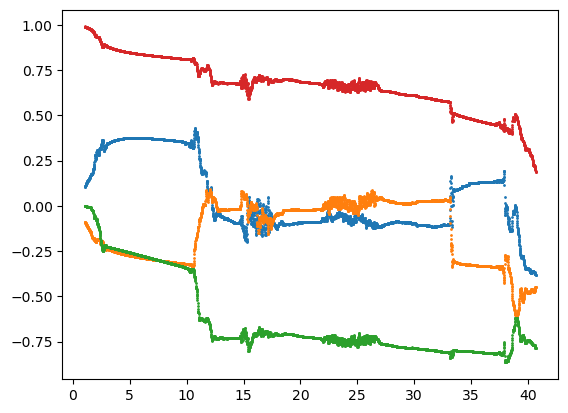

In [14]:
plt.scatter(test, q[1], s=1)
plt.scatter(test, q[2], s=1)
plt.scatter(test, q[3], s=1)
plt.scatter(test, q[0], s=1)

In [15]:
r = Rotation.from_quat(q.T)

# Identify jumping

First try rotating the accel vector using the quarternion to try to figure out jumping up vs other accelerations:

### No transform

pre-jump segment
mean of abs 0.04593818637399911 0.04382487123971308 0.044529273416648134
med of abs 0.0255126953125 0.015045166015625 0.01739501953125
std 0.08138233179979558 0.07548836603091115 0.07465564073265406
jump segment
mean of abs 0.06412085874832887 0.035166694518716575 0.021795861011307933
med of abs 0.0091552734375 0.00250244140625 0.00396728515625
std 0.1330136059532393 0.07540200145104956 0.04583764750467976
spin segment
mean of abs 0.02297815877061052 0.018912738657252674 0.01004229594891934
med of abs 0.00640869140625 0.001953125 0.00323486328125
std 0.08427501760410137 0.0935252776432978 0.036600866563833524


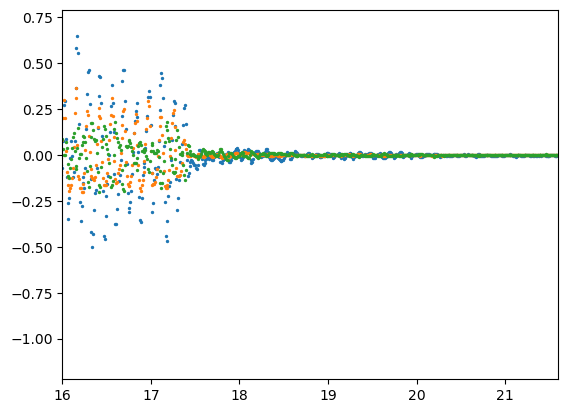

In [16]:
av = np.array([ax, ay, az])
axp, ayp, azp = av
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

### Inverse=True

pre-jump segment
mean of abs 0.04529769145372348 0.04190443715713337 0.04697930833607648
med of abs 0.025193455530266994 0.016845842888027936 0.01590269244884885
std 0.07927185286347628 0.07233785099854018 0.08056880302366635
jump segment
mean of abs 0.06599918540026334 0.012525670773341132 0.0349499121024452
med of abs 0.009678860950923044 0.003006664069328345 0.002908327794402914
std 0.13793704839169954 0.02691512066988791 0.07564940006859
spin segment
mean of abs 0.02755447158248413 0.013150692217903413 0.014948589137066714
med of abs 0.006429388431176442 0.0029342163827230376 0.002664460659202691
std 0.10353505360737258 0.050157208540810794 0.06286662958722256


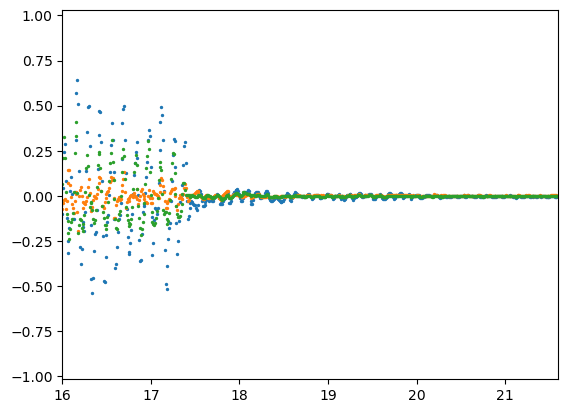

In [17]:
av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=True).T
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

### Inverse=False

pre-jump segment
mean of abs 0.04930451961541461 0.04373863564830599 0.042754206121560834
med of abs 0.025606433920104435 0.017792289792937305 0.014931212912802212
std 0.08536449036804075 0.07202443363706236 0.07400043801547734
jump segment
mean of abs 0.05650861762857426 0.021479366039530316 0.0458735702655708
med of abs 0.0085417691819074 0.004794747861433038 0.003765339936806998
std 0.11941062824236076 0.04391967402902766 0.09636563043843178
spin segment
mean of abs 0.019448389397901552 0.013045726750835263 0.020894050019814484
med of abs 0.005671835261576355 0.003945027634487865 0.002638473154497569
std 0.07328226173278576 0.045979826228210535 0.09852548531186973


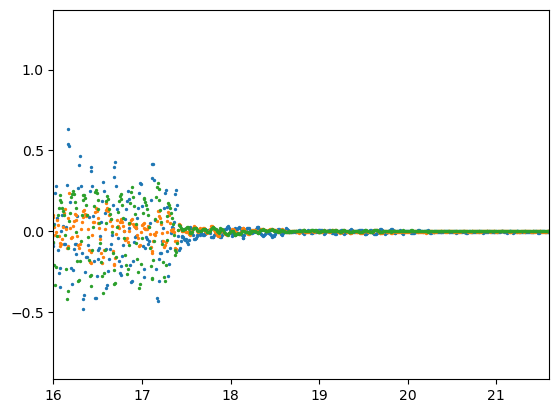

In [18]:
av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=False).T
plt.scatter(test, axp, s=2, c='C0')
plt.scatter(test, ayp, s=2, c='C1')
plt.scatter(test, azp, s=2, c='C2')

plt.xlim(16, 21.6)
msk = ((16+16-21.6)<test)&(test <16)
print('pre-jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (16<test)&(test <21.6)
print('jump segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

msk = (28<test)&(test<(28+(21.6-16)))
print('spin segment')
print('mean of abs', np.mean(np.abs(axp[msk])), np.mean(np.abs(ayp[msk])), np.mean(np.abs(azp[msk])))
print('med of abs', np.median(np.abs(axp[msk])), np.median(np.abs(ayp[msk])), np.median(np.abs(azp[msk])))
print('std', np.std(axp[msk]), np.std(ayp[msk]), np.std(azp[msk]))

Suggests that a running std window on the de-rotated z or raw x will do the job, although possibly mean of abs is sufficient

Text(0, 0.5, 'absmean')

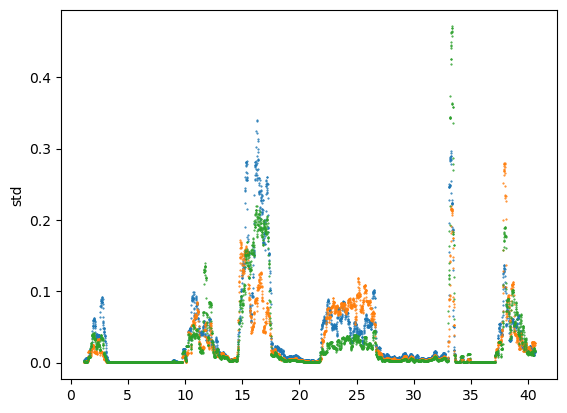

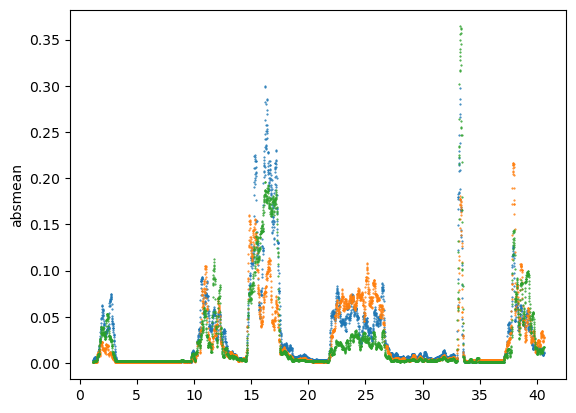

In [19]:
window_size = 21

av = np.array([ax, ay, az])
axp, ayp, azp = r.apply(av.T, inverse=False).T

plt.plot(test[window_size//2:-window_size//2+1], np.std(np.lib.stride_tricks.sliding_window_view(axp, window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.std(np.lib.stride_tricks.sliding_window_view(ayp, window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.std(np.lib.stride_tricks.sliding_window_view(azp, window_size), axis=1), '.', ms=1)
plt.ylabel('std')

plt.figure()
plt.plot(test[window_size//2:-window_size//2+1], np.mean(np.lib.stride_tricks.sliding_window_view(np.abs(axp), window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.mean(np.lib.stride_tricks.sliding_window_view(np.abs(ayp), window_size), axis=1), '.', ms=1)
plt.plot(test[window_size//2:-window_size//2+1], np.mean(np.lib.stride_tricks.sliding_window_view(np.abs(azp), window_size), axis=1), '.', ms=1)
plt.ylabel('absmean')

# Identify spinning

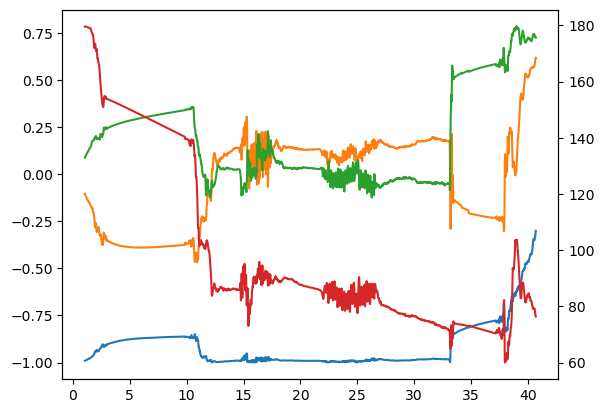

In [20]:
v = r.as_rotvec(degrees=True)
ang = np.linalg.norm(v, axis=1)
n = v.T/ang
nx, ny, nz = n

plt.figure()

plt.plot(test, nx)
plt.plot(test, ny)
plt.plot(test, nz)

plt.twinx()
plt.plot(test, ang, c='C3')

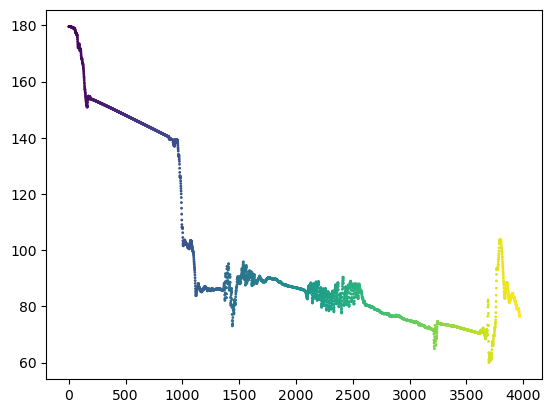

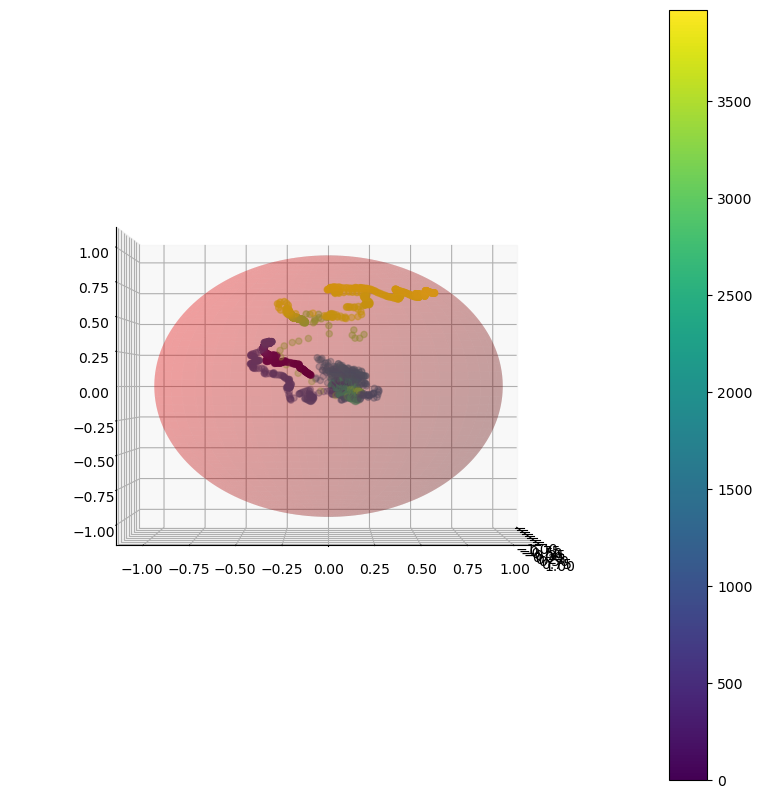

In [21]:
plt.scatter(np.arange(len(ang)), ang, c=np.arange(len(ang)), s=1)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))
y = 1 * np.outer(np.sin(u), np.sin(v))
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='r', alpha=.2)

m = ax.scatter(nx, ny, nz, c=np.arange(len(nx)))
fig.colorbar(m)
ax.azim =  0
ax.elev = 0

Need to work out how the coordinate system is rotated w.r.t. the *original* z-axis?

$ \tan(\theta)= y/x, \theta = \arctan2(y, x)$

So need to rotate the z-axis into the rotated space, compute the above

In [22]:
import sympy
from sympy import symbols, Quaternion
x,y,z,w,qx,qy,qz,qw = symbols('x,y,z,w,q_x,q_y,q_z,q_w')


### active

In [23]:
qs = Quaternion(qw,qx,qy,qz) 
p = Quaternion(w, x, y, z)

r = (qs.conjugate()*p*qs).simplify()
rz = r.subs({w:0, x:0, y:0, z:1})
rz.c/rz.b

(2*q_w*q_x + 2*q_y*q_z)/(-2*q_w*q_y + 2*q_x*q_z)

(-15.0, 15.0)

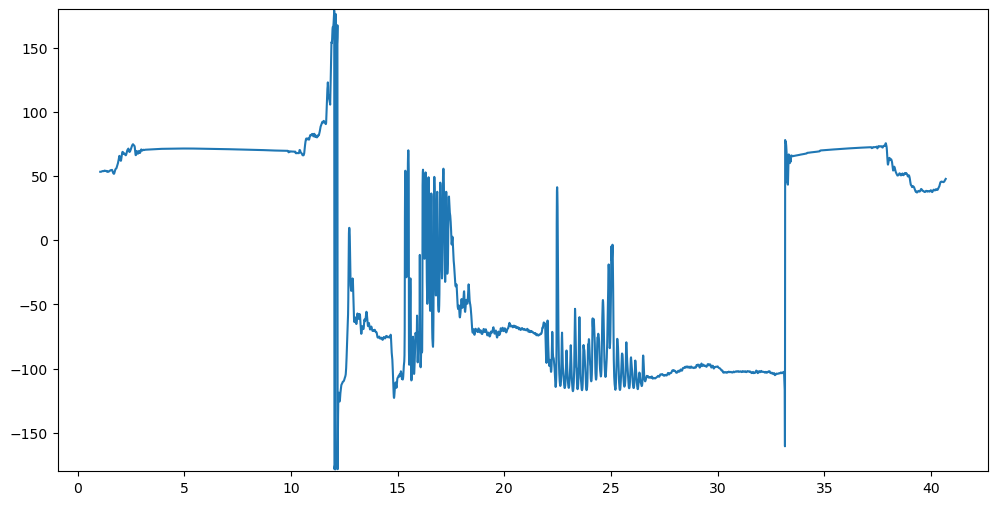

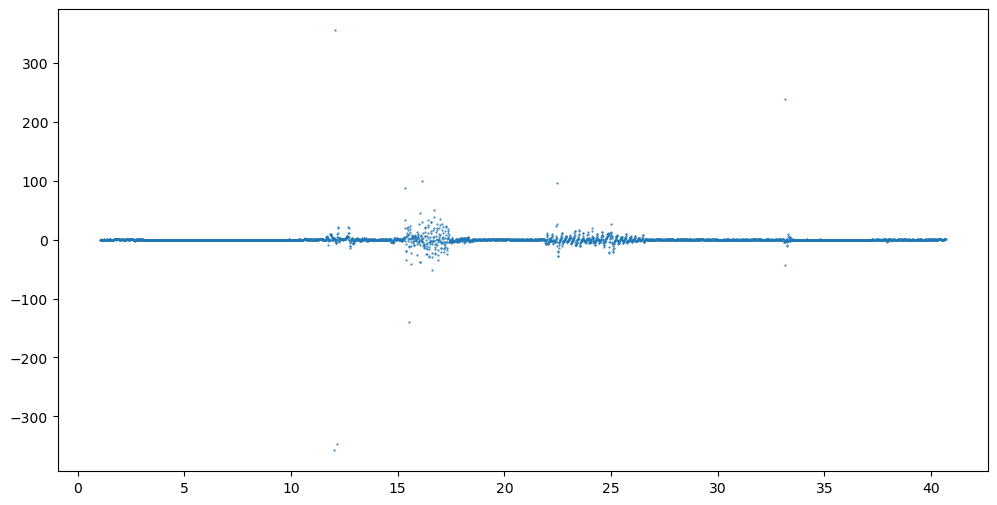

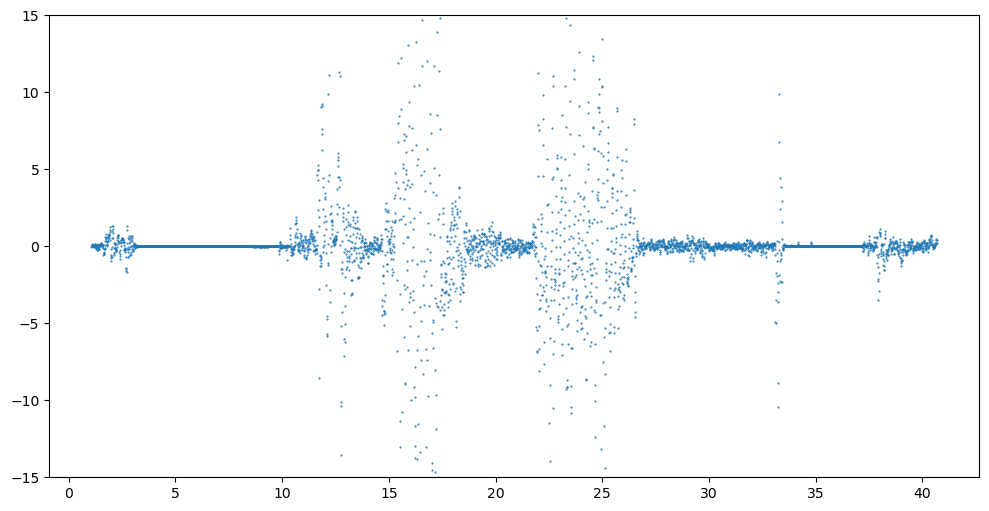

In [24]:
num = 2*(q[0]*q[1] + q[2]*q[3])
den = 2*(-q[0]*q[2] + q[1]*q[2])

ang = np.arctan2(num, den)
dang = np.degrees(ang)

plt.figure(figsize=(12, 6))
plt.plot(test, dang)
plt.ylim(-180, 180)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)
plt.ylim(-15,15)

### passive

In [25]:
qs = Quaternion(qw,qx,qy,qz) 
p = Quaternion(w, x, y, z)

r = (qs*p*qs.conjugate()).simplify()
rz = r.subs({w:0, x:0, y:0, z:1})
rz.c/rz.b

(-2*q_w*q_x + 2*q_y*q_z)/(2*q_w*q_y + 2*q_x*q_z)

(-15.0, 15.0)

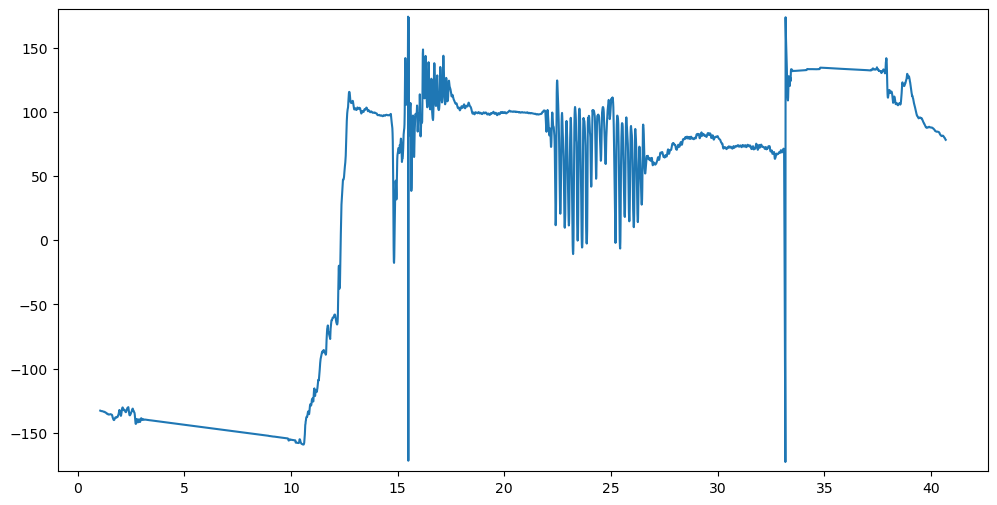

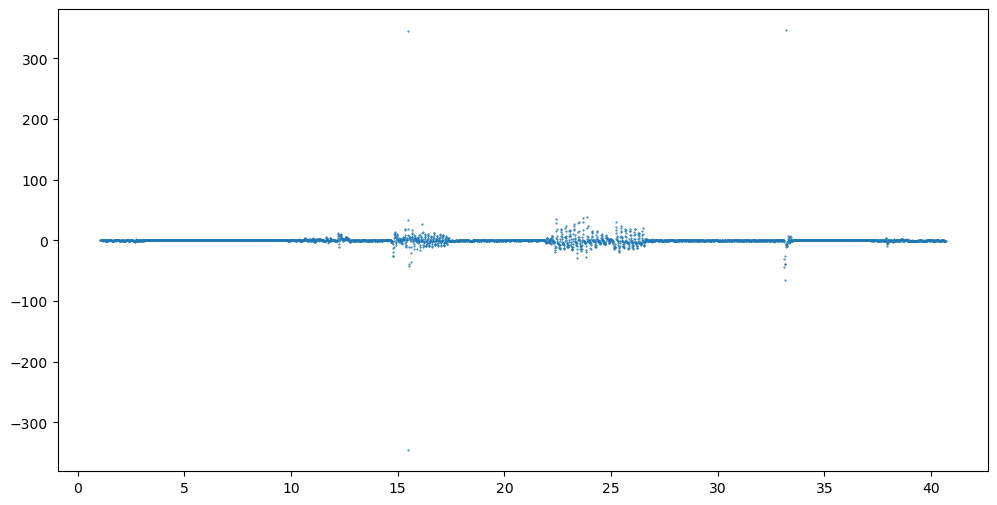

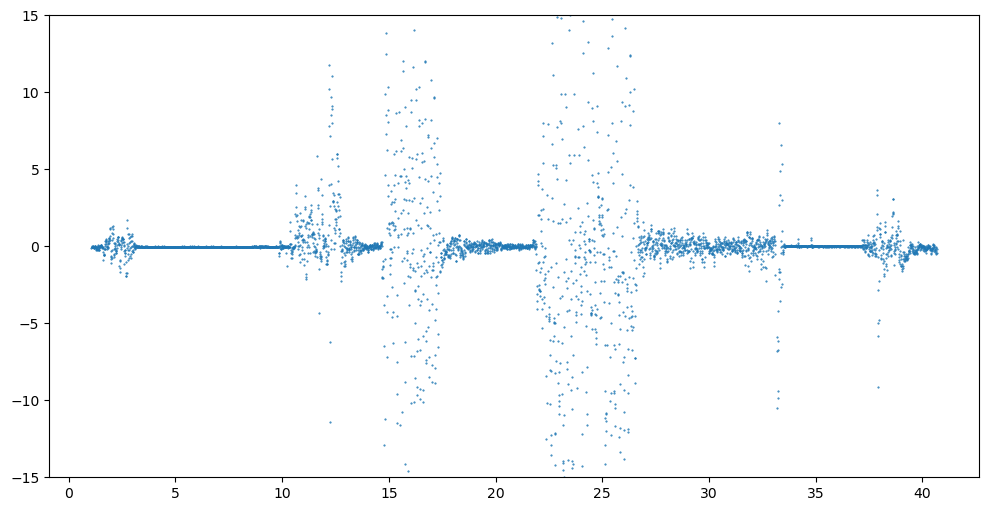

In [26]:
num = 2*(-q[0]*q[1] + q[2]*q[3])
den = 2*(q[0]*q[2] + q[1]*q[2])

ang = np.arctan2(num, den)
dang = np.degrees(ang)

plt.figure(figsize=(12, 6))
plt.plot(test, dang)
plt.ylim(-180, 180)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)

plt.figure(figsize=(12, 6))
plt.plot(test[:-1], np.diff(dang), '.', ms=1)
plt.ylim(-15,15)

Maybe if the average of the last 3 of the passive are above some threshold?

(Probably works better if the spin and jump cannot be combined?)